In [740]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from seaborn import pairplot, heatmap
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import scipy.stats as stats
import pylab as py 


import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)



In [ ]:
# Python data science brain station course project

In [ ]:
# Salil Bedkihal

In [ ]:

# Project description: Analysing the Astronomical data taken from Kelplar telescope 

In [ ]:
# This data describes various attributes of exoplanets 

In [ ]:
# The aim of the project is to find how these attributes relate to each other

In [25]:
# Read csv file
pd.read_csv('planets.csv')

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
0,1,11 Com,b,Radial Velocity,1,326.030000,0.320000,-0.320000,0.0,1.290000,...,0.30,-0.30,0.0,False,19.00,2.00,-2.00,False,False,2014-05-14
1,2,11 UMi,b,Radial Velocity,1,516.220000,3.250000,-3.250000,0.0,1.540000,...,0.25,-0.25,0.0,False,24.08,1.84,-1.84,False,False,2014-05-14
2,3,14 And,b,Radial Velocity,1,185.840000,0.230000,-0.230000,0.0,0.830000,...,0.10,-0.20,0.0,False,11.00,1.00,-1.00,False,False,2014-05-14
3,4,14 Her,b,Radial Velocity,1,1773.400000,2.500000,-2.500000,0.0,2.770000,...,0.05,-0.05,0.0,False,NaN,NaN,NaN,NaN,False,2014-05-14
4,5,16 Cyg B,b,Radial Velocity,1,798.500000,1.000000,-1.000000,0.0,1.681000,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,False,2015-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,3368,ups And,b,Radial Velocity,4,4.617033,0.000023,-0.000023,0.0,0.059222,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3368,3369,ups And,c,Radial Velocity,4,241.258000,0.064000,-0.064000,0.0,0.827774,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3369,3370,ups And,d,Radial Velocity,4,1276.460000,0.570000,-0.570000,0.0,2.513290,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3370,3371,ups And,e,Radial Velocity,4,3848.860000,0.740000,-0.740000,0.0,5.245580,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14


In [29]:
# Build data frame 
df_csv = pd.read_csv('planets.csv', header = 0)

In [32]:
df_csv

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
0,1,11 Com,b,Radial Velocity,1,326.030000,0.320000,-0.320000,0.0,1.290000,...,0.30,-0.30,0.0,False,19.00,2.00,-2.00,False,False,2014-05-14
1,2,11 UMi,b,Radial Velocity,1,516.220000,3.250000,-3.250000,0.0,1.540000,...,0.25,-0.25,0.0,False,24.08,1.84,-1.84,False,False,2014-05-14
2,3,14 And,b,Radial Velocity,1,185.840000,0.230000,-0.230000,0.0,0.830000,...,0.10,-0.20,0.0,False,11.00,1.00,-1.00,False,False,2014-05-14
3,4,14 Her,b,Radial Velocity,1,1773.400000,2.500000,-2.500000,0.0,2.770000,...,0.05,-0.05,0.0,False,NaN,NaN,NaN,NaN,False,2014-05-14
4,5,16 Cyg B,b,Radial Velocity,1,798.500000,1.000000,-1.000000,0.0,1.681000,...,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,False,2015-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,3368,ups And,b,Radial Velocity,4,4.617033,0.000023,-0.000023,0.0,0.059222,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3368,3369,ups And,c,Radial Velocity,4,241.258000,0.064000,-0.064000,0.0,0.827774,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3369,3370,ups And,d,Radial Velocity,4,1276.460000,0.570000,-0.570000,0.0,2.513290,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14
3370,3371,ups And,e,Radial Velocity,4,3848.860000,0.740000,-0.740000,0.0,5.245580,...,NaN,NaN,0.0,False,1.56,NaN,NaN,False,False,2014-05-14


In [33]:
# Displaying the dictionary object. It's convienent to display all the descriptions of different parameters  

In [37]:
reader = csv.DictReader(open('planets.csv'))
dictobj = next(reader)
dictobj

OrderedDict([('rowid', '1'),
             ('pl_hostname', '11 Com'),
             ('pl_letter', 'b'),
             ('pl_discmethod', 'Radial Velocity'),
             ('pl_pnum', '1'),
             ('pl_orbper', '326.03000000'),
             ('pl_orbpererr1', '0.32000000'),
             ('pl_orbpererr2', '-0.32000000'),
             ('pl_orbperlim', '0'),
             ('pl_orbsmax', '1.290000'),
             ('pl_orbsmaxerr1', '0.050000'),
             ('pl_orbsmaxerr2', '-0.050000'),
             ('pl_orbsmaxlim', 'false'),
             ('pl_orbeccen', '0.231000'),
             ('pl_orbeccenerr1', '0.005000'),
             ('pl_orbeccenerr2', '-0.005000'),
             ('pl_orbeccenlim', '0'),
             ('pl_orbincl', ''),
             ('pl_orbinclerr1', ''),
             ('pl_orbinclerr2', ''),
             ('pl_orbincllim', ''),
             ('pl_bmassj', '19.40000'),
             ('pl_bmassjerr1', '1.50000'),
             ('pl_bmassjerr2', '-1.50000'),
             ('pl_bmassjlim

In [ ]:
# Extracting subset of dataframe corresponding certain physical parameters: pl_orbper	pl_orbsmax	st_tefferr1
# We want to identify rows with Nan and not include them in the data analysis 

In [223]:
data_exoplanets = df_csv[['pl_hostname', 'pl_orbper','pl_orbsmax','st_tefferr1','pl_bmassj','st_disterr1','st_optmag','st_dist']]
df=data_exoplanets
df

,pl_hostname,pl_orbper,pl_orbsmax,st_tefferr1,pl_bmassj,st_disterr1,st_optmag,st_dist
0,11 Com,326.030000,1.290000,100.0,19.4000,9.61,4.740,110.62
1,11 UMi,516.220000,1.540000,70.0,10.5000,6.22,5.016,119.47
2,14 And,185.840000,0.830000,20.0,4.8000,3.93,NaN,76.39
3,14 Her,1773.400000,2.770000,87.0,4.6400,0.19,6.610,18.15
4,16 Cyg B,798.500000,1.681000,NaN,1.6800,0.23,6.250,21.41
...,...,...,...,...,...,...,...,...
3367,ups And,4.617033,0.059222,NaN,0.6876,0.13,4.100,13.47
3368,ups And,241.258000,0.827774,NaN,1.9810,0.13,4.100,13.47
3369,ups And,1276.460000,2.513290,NaN,4.1320,0.13,4.100,13.47
3370,ups And,3848.860000,5.245580,NaN,1.0590,0.13,4.100,13.47


In [43]:
secondf_1=pd.notnull(df['pl_bmassj'])
df[secondf_1]

,pl_hostname,pl_orbper,pl_orbsmax,st_tefferr1,pl_bmassj
0,11 Com,326.030000,1.290000,100.0,19.4000
1,11 UMi,516.220000,1.540000,70.0,10.5000
2,14 And,185.840000,0.830000,20.0,4.8000
3,14 Her,1773.400000,2.770000,87.0,4.6400
4,16 Cyg B,798.500000,1.681000,NaN,1.6800
...,...,...,...,...,...
3367,ups And,4.617033,0.059222,NaN,0.6876
3368,ups And,241.258000,0.827774,NaN,1.9810
3369,ups And,1276.460000,2.513290,NaN,4.1320
3370,ups And,3848.860000,5.245580,NaN,1.0590


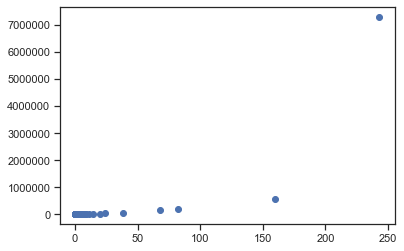

In [555]:
# Linear regression 
data_exoplanets = df_csv[['pl_orbsmax', 'pl_orbper']]
data_exoplanets = data_exoplanets.sort_values(by=['pl_orbsmax','pl_orbper'])
df1=data_exoplanets
df1=df1.dropna()
df1
x = df1[['pl_orbsmax']]
#y= df1[['pl_orbper']]
plt.scatter(x,y)
#print(x)
#print(y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2752e290>]],
      dtype=object)

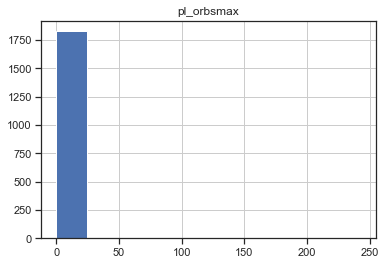

In [556]:

x.hist()
#y.hist()
# From the histograms we see that data is not quite following normal distribution

In [ ]:


# We still first try the linear model


                                 OLS Regression Results                                
Dep. Variable:              pl_orbper   R-squared (uncentered):                   0.660
Model:                            OLS   Adj. R-squared (uncentered):              0.660
Method:                 Least Squares   F-statistic:                              3553.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):                        0.00
Time:                        20:49:21   Log-Likelihood:                         -23675.
No. Observations:                1831   AIC:                                  4.735e+04
Df Residuals:                    1830   BIC:                                  4.736e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

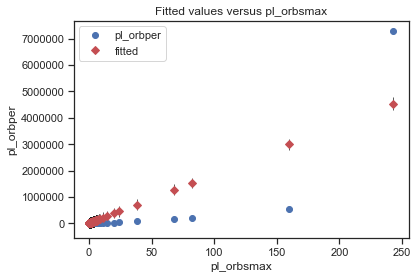

In [546]:
# Linear Regression analysis 
#regr = linear_model.LinearRegression()
#regr.fit(x, y)
#print('Intercept: \n', regr.intercept_)
#print('Coefficients: \n', regr.coef_)


model = sm.OLS(y, x, missing='drop')
results = model.fit()
print(results.summary())
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
plt.show()
# R^2 is much less than 1
# Linear model is not a good for these variables



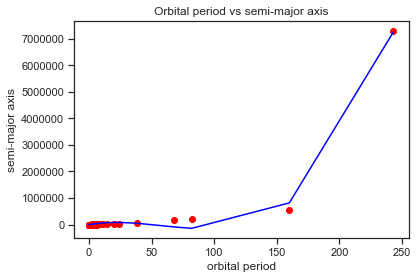

In [545]:
#X2 = sm.add_constant(x)
#est = sm.OLS(y, X2)
#est2 = est.fit()
#print(est2.summary())
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), color='blue')
    plt.title('Orbital period vs semi-major axis')
    plt.xlabel('orbital period')
    plt.ylabel('semi-major axis')
    #plt.xlim(0,2000)
    #plt.ylim(0,20)
    plt.show()
    return
viz_polymonial()

# There at least seem to be a non-linear relation between orbital period and the sem-major axis of the oribt


In [229]:
x1 = df[['st_tefferr1']]
y1= df[['st_optmag']]
# Is there a linear relation between surface temperature and the optical magnitude of these exoplanets?


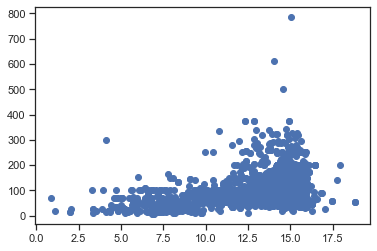

In [296]:
plt.scatter(y1,x1)

In [294]:
model = sm.OLS(x1, y1, missing='drop')
results = model.fit()
print(results.summary())



                                 OLS Regression Results                                
Dep. Variable:            st_tefferr1   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                          1.104e+04
Date:                Sat, 15 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:45:06   Log-Likelihood:                         -16612.
No. Observations:                3045   AIC:                                  3.323e+04
Df Residuals:                    3044   BIC:                                  3.323e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Linear regression analysis: Is there a linear relation between surface temperature and the optical magnitude of the exoplanets?


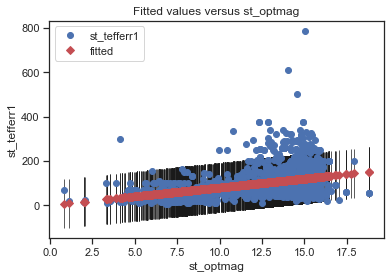

In [295]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
plt.show()

In [258]:
# Although the R-squared is much less than one, linear model is not a good fit
# The probability of F statistics is quite small
# We can reject the null hypothesis 

In [259]:
# Relation between planet mass and the optical magnitude 

In [746]:
data_exoplanets = df_csv[['pl_bmassj', 'st_optmag']]
#Sorting data for the purpose of polynomial regression to avoid multiple data-traces 
data_exoplanets = data_exoplanets.sort_values(by=['pl_bmassj','st_optmag'])
df3=data_exoplanets
df4=df3.dropna()
df4

,pl_bmassj,st_optmag
2351,0.00020,12.521
1334,0.00021,12.925
912,0.00050,12.882
2425,0.00063,13.552
858,0.00100,11.492
...,...,...
423,24.09000,8.425
9,24.50000,14.240
3360,27.00000,3.340
790,27.23000,10.701


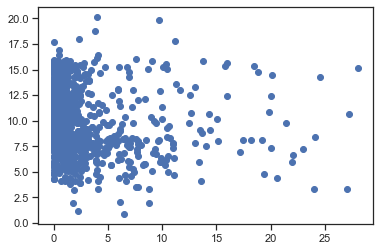

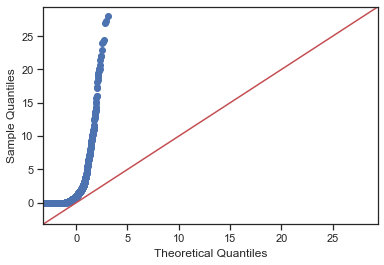

In [792]:
x2 = df4[['pl_bmassj']]
y2= df4[['st_optmag']]
#plt.xlim(0,2000)
#plt.ylim(0,20)
plt.scatter(x2,y2)
sm.qqplot(x2, line ='45') 
py.show()
# QQ plot shows the normality is not satisfied 



In [554]:
model = sm.OLS(y2, x2, missing='drop')
results = model.fit()
print(results.summary())
p_values = results.summary2().tables[1]['P>|t|']
p_values


                                 OLS Regression Results                                
Dep. Variable:              st_optmag   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.207
Method:                 Least Squares   F-statistic:                              275.9
Date:                Sat, 15 Aug 2020   Prob (F-statistic):                    3.25e-55
Time:                        21:08:01   Log-Likelihood:                         -3866.0
No. Observations:                1056   AIC:                                      7734.
Df Residuals:                    1055   BIC:                                      7739.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

pl_bmassj    3.246690e-55
Name: P>|t|, dtype: float64

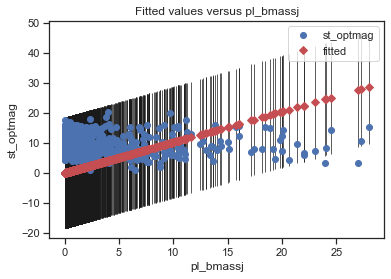

In [528]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
#plt.xlim(0,2000)
#plt.ylim(0,20)
plt.show()
# Linear model does not well at all based on R^2 criteria 
# prob(F-static) is quite small
# We can reject the null hypothesis 

In [529]:
# We analyze the relation between optical magnitude and the distance

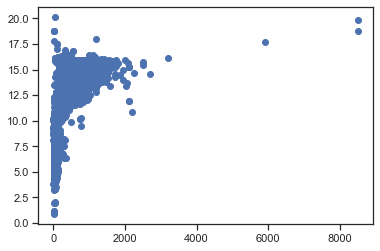

In [616]:
data_exoplanets = df_csv[['st_dist', 'st_optmag']]
#Sorting data for the purpose of polynomial regression to avoid multiple data-traces 
data_exoplanets = data_exoplanets.sort_values(by=['st_dist','st_optmag'])
df4=data_exoplanets
df5=df4.dropna()
df5
x3 = df5[['st_dist']]
y3= df5[['st_optmag']]
plt.scatter(x3,y3)


In [617]:
model = sm.OLS(y3, x3, missing='drop')
results = model.fit()
print(results.summary())
p_values = results.summary2().tables[1]['P>|t|']
p_values

                                 OLS Regression Results                                
Dep. Variable:              st_optmag   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.671
Method:                 Least Squares   F-statistic:                              4492.
Date:                Sat, 15 Aug 2020   Prob (F-statistic):                        0.00
Time:                        22:31:43   Log-Likelihood:                         -7530.3
No. Observations:                2201   AIC:                                  1.506e+04
Df Residuals:                    2200   BIC:                                  1.507e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

st_dist    0.0
Name: P>|t|, dtype: float64

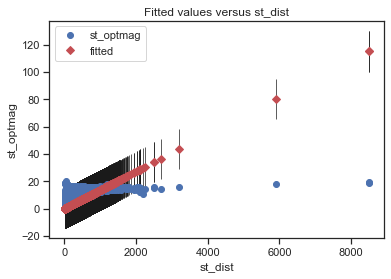

In [618]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)

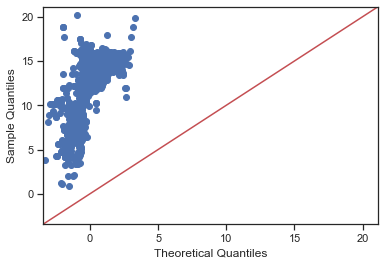

In [742]:
# Probability of F statistics is very small
# There is no definite relation between distance and the absolute optical magnitude
# Null hypothesis is therefor rejected
# This makes sense. Because farther the planet does not mean the absolute magntitude should increase or decrease

# QQ plot
sm.qqplot(y3, line ='45') 
py.show() 
# From QQ plots it is clear that normality assumption is not satisfied



[[ 9.75206612e-01  3.10862447e-15]
 [-7.54951657e-15  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00]]


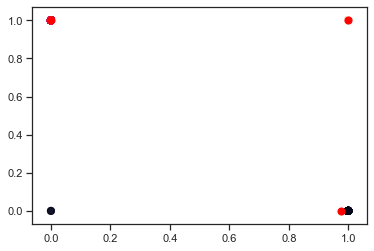

In [805]:
# Now we analyze the K-means clustering of the different attributes to
df7 = df_csv[['pl_bmassj', 'st_optmag']]
df8=df7.notna()
kmeans = KMeans(n_clusters=3).fit(df8)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df8['pl_bmassj'], df8['st_optmag'], c= kmeans.labels_.astype(float), s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
# Exploring clustering algorithm for the data

[[-1.99840144e-15  5.10702591e-15]
 [ 1.00000000e+00  4.60742555e-15]
 [ 1.00000000e+00  1.00000000e+00]
 [ 5.55111512e-16  1.00000000e+00]]


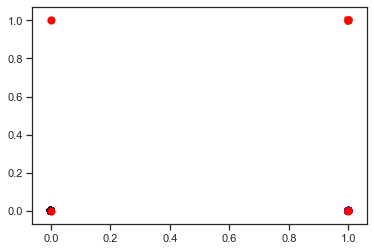

In [806]:
df_csv = pd.read_csv('planets.csv', header = 0)
df9=df_csv.notna()
df10= df9[['pl_orbsmax', 'pl_orbeccen']]
kmeans = KMeans(n_clusters=4).fit(df10)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df10['pl_orbsmax'], df10['pl_orbeccen'], c= kmeans.labels_.astype(float), s=50, alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()